In [1]:
from fastai.vision.all import * 

In [3]:
from torch.utils.cpp_extension import CUDA_HOME

In [4]:
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /home/murat/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [5]:
pip install icedata

Note: you may need to restart the kernel to use updated packages.


In [6]:
#For more information about how the fridge dataset as well as its corresponding parser, check out the fridge folder in icedata.
# Download the dataset
url = "https://cvbp-secondary.z19.web.core.windows.net/datasets/object_detection/odFridgeObjects.zip"
dest_dir = "fridge"
data_dir = icedata.load_data(url, dest_dir)


In [7]:
#Parse the dataset
# Create the parser
parser = parsers.VOCBBoxParser(annotations_dir=data_dir / "odFridgeObjects/annotations", images_dir=data_dir / "odFridgeObjects/images")

In [8]:
train_records, valid_records = parser.parse()
parser.class_map



100%|██████████| 128/128 [00:00<00:00, 548.58it/s]
INFO     - Autofixing records | icevision.parsers.parser:parse:122
100%|██████████| 128/128 [00:00<00:00, 5523.02it/s]


<ClassMap: {'background': 0, 'carton': 1, 'milk_bottle': 2, 'can': 3, 'water_bottle': 4}>

In [9]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])


In [10]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)


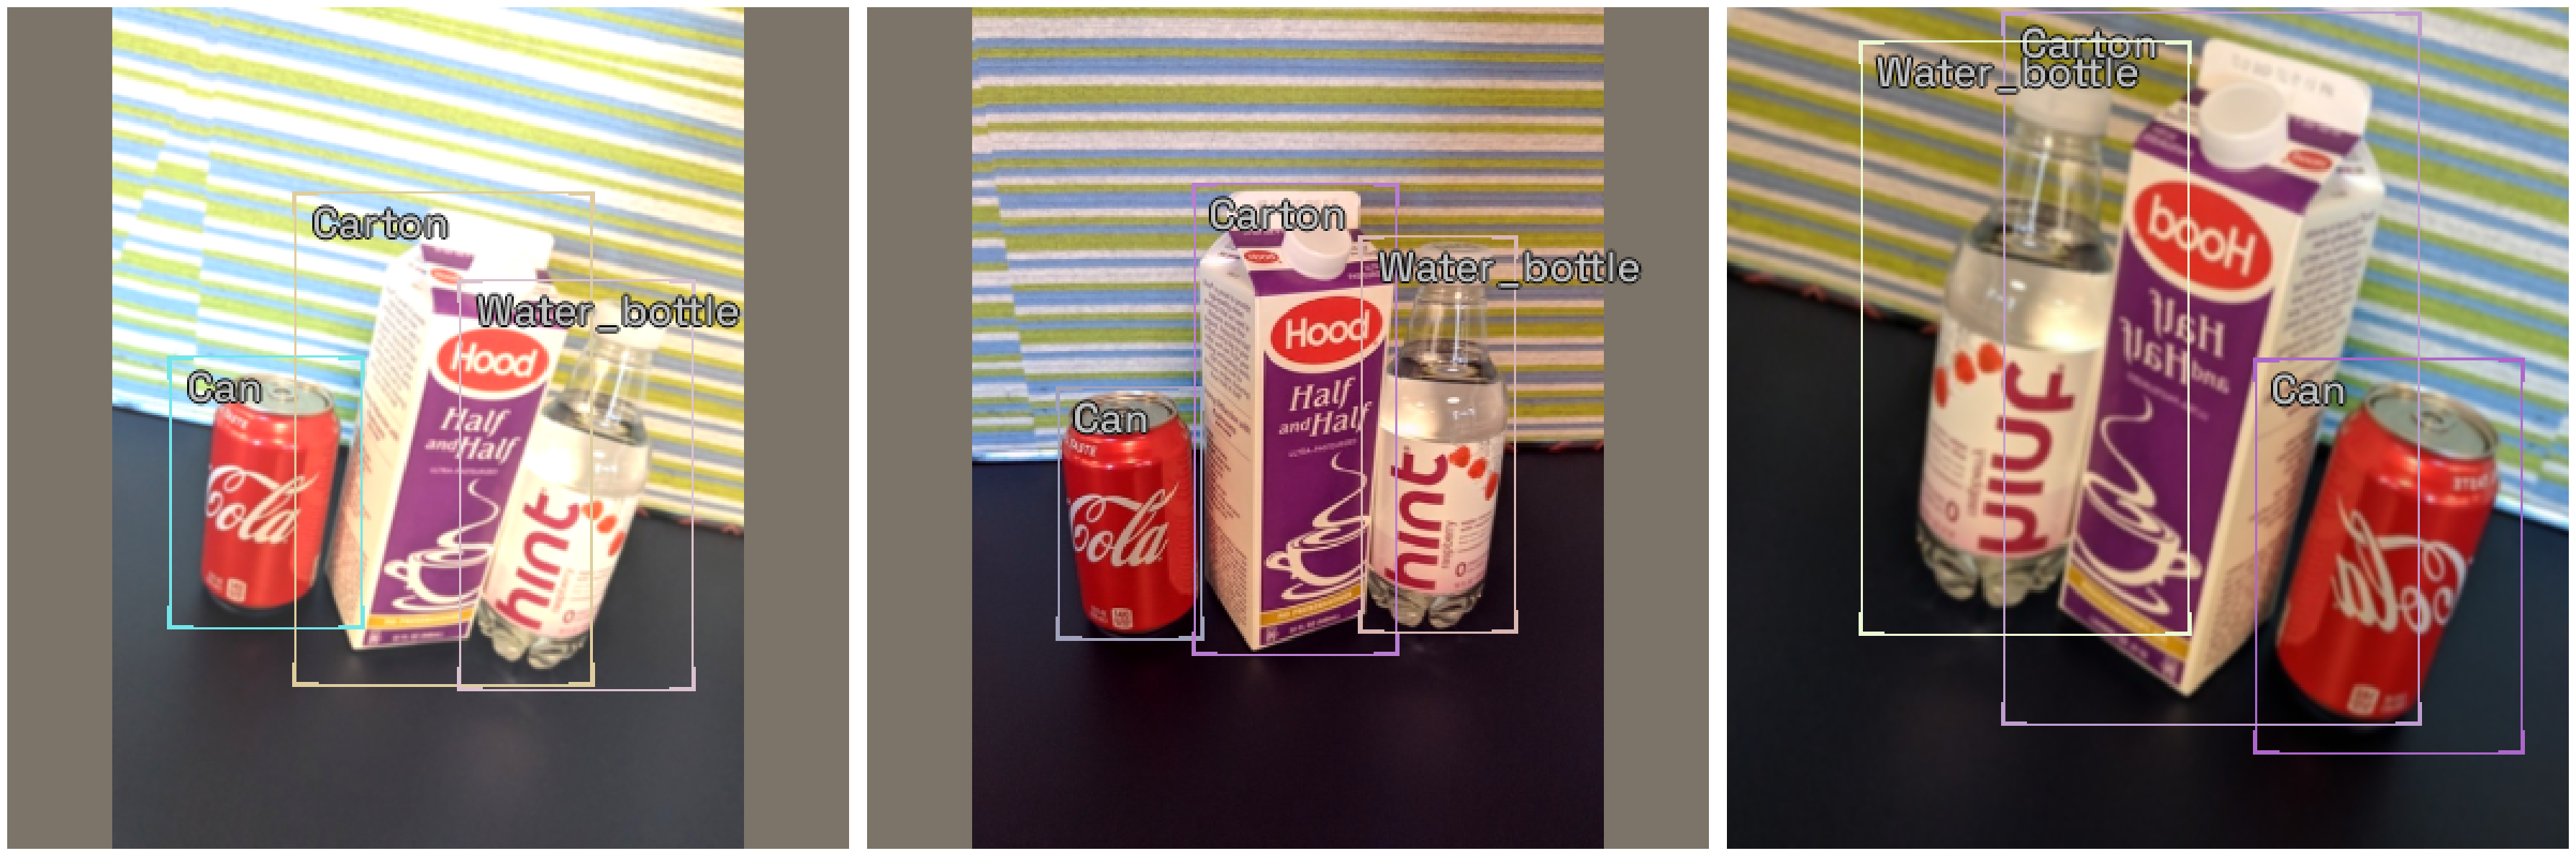

In [11]:
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

In [12]:

model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)

In [14]:
# #different neural network architectures

# # Just change the value of selection to try another model

selection = 0

extra_args = {}

# if selection == 0:
#   model_type = models.mmdet.vfnet
#   backbone = model_type.backbones.resnet50_fpn_mstrain_2x

# if selection == 1:
#   model_type = models.mmdet.retinanet
#   backbone = model_type.backbones.resnet50_fpn_1x
#   # extra_args['cfg_options'] = { 
#   #   'model.bbox_head.loss_bbox.loss_weight': 2,
#   #   'model.bbox_head.loss_cls.loss_weight': 0.8,
#   #    }

# if selection == 2:
#   model_type = models.mmdet.faster_rcnn
#   backbone = model_type.backbones.resnet101_fpn_2x
#   # extra_args['cfg_options'] = { 
#   #   'model.roi_head.bbox_head.loss_bbox.loss_weight': 2,
#   #   'model.roi_head.bbox_head.loss_cls.loss_weight': 0.8,
#   #    }

# if selection == 3:
#   model_type = models.mmdet.ssd
#   backbone = model_type.backbones.ssd300

# if selection == 4:
#   model_type = models.mmdet.yolox
#   backbone = model_type.backbones.yolox_s_8x8

# if selection == 5:
#   model_type = models.mmdet.yolof
#   backbone = model_type.backbones.yolof_r50_c5_8x8_1x_coco

# if selection == 6:
#   model_type = models.mmdet.detr
#   backbone = model_type.backbones.r50_8x2_150e_coco

# if selection == 7:
#   model_type = models.mmdet.deformable_detr
#   backbone = model_type.backbones.twostage_refine_r50_16x2_50e_coco

# if selection == 8:
#   model_type = models.mmdet.fsaf
#   backbone = model_type.backbones.x101_64x4d_fpn_1x_coco

# if selection == 9:
#   model_type = models.mmdet.sabl
#   backbone = model_type.backbones.r101_fpn_gn_2x_ms_640_800_coco

# if selection == 10:
#   model_type = models.mmdet.centripetalnet
#   backbone = model_type.backbones.hourglass104_mstest_16x6_210e_coco

# elif selection == 11:
#   # The Retinanet model is also implemented in the torchvision library
#   model_type = models.torchvision.retinanet
#   backbone = model_type.backbones.resnet50_fpn

# elif selection == 12:
#   model_type = models.ross.efficientdet
#   backbone = model_type.backbones.tf_lite0
#   # The efficientdet model requires an img_size parameter
#   extra_args['img_size'] = image_size

# elif selection == 13:
#   model_type = models.ultralytics.yolov5
#   backbone = model_type.backbones.small
#   # The yolov5 model requires an img_size parameter
#   extra_args['img_size'] = image_size

model_type, backbone, extra_args


(<module 'icevision.models.mmdet.models.retinanet' from '/home/murat/miniconda3/lib/python3.9/site-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})

In [15]:
backbone.__dict__

{'model_name': 'retinanet',
 'config_path': Path('/home/murat/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth',
 'pretrained': True}

In [16]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 


/home/murat/miniconda3/lib/python3.9/site-packages/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  warnings.warn(
2022-03-29 23:14:26,583 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-03-29 23:14:26,585 - mmcv - INFO - load model from: torchvision://resnet50
2022-03-29 23:14:26,586 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-03-29 23:14:30,803 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-03-29 23:14:30,865 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-03-29 23:14:30,940 - mmcv - INFO - initialize RetinaHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'retina_cls', 'std': 0.0

load checkpoint from local path: checkpoints/retinanet/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([36, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([36]).


In [17]:

# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

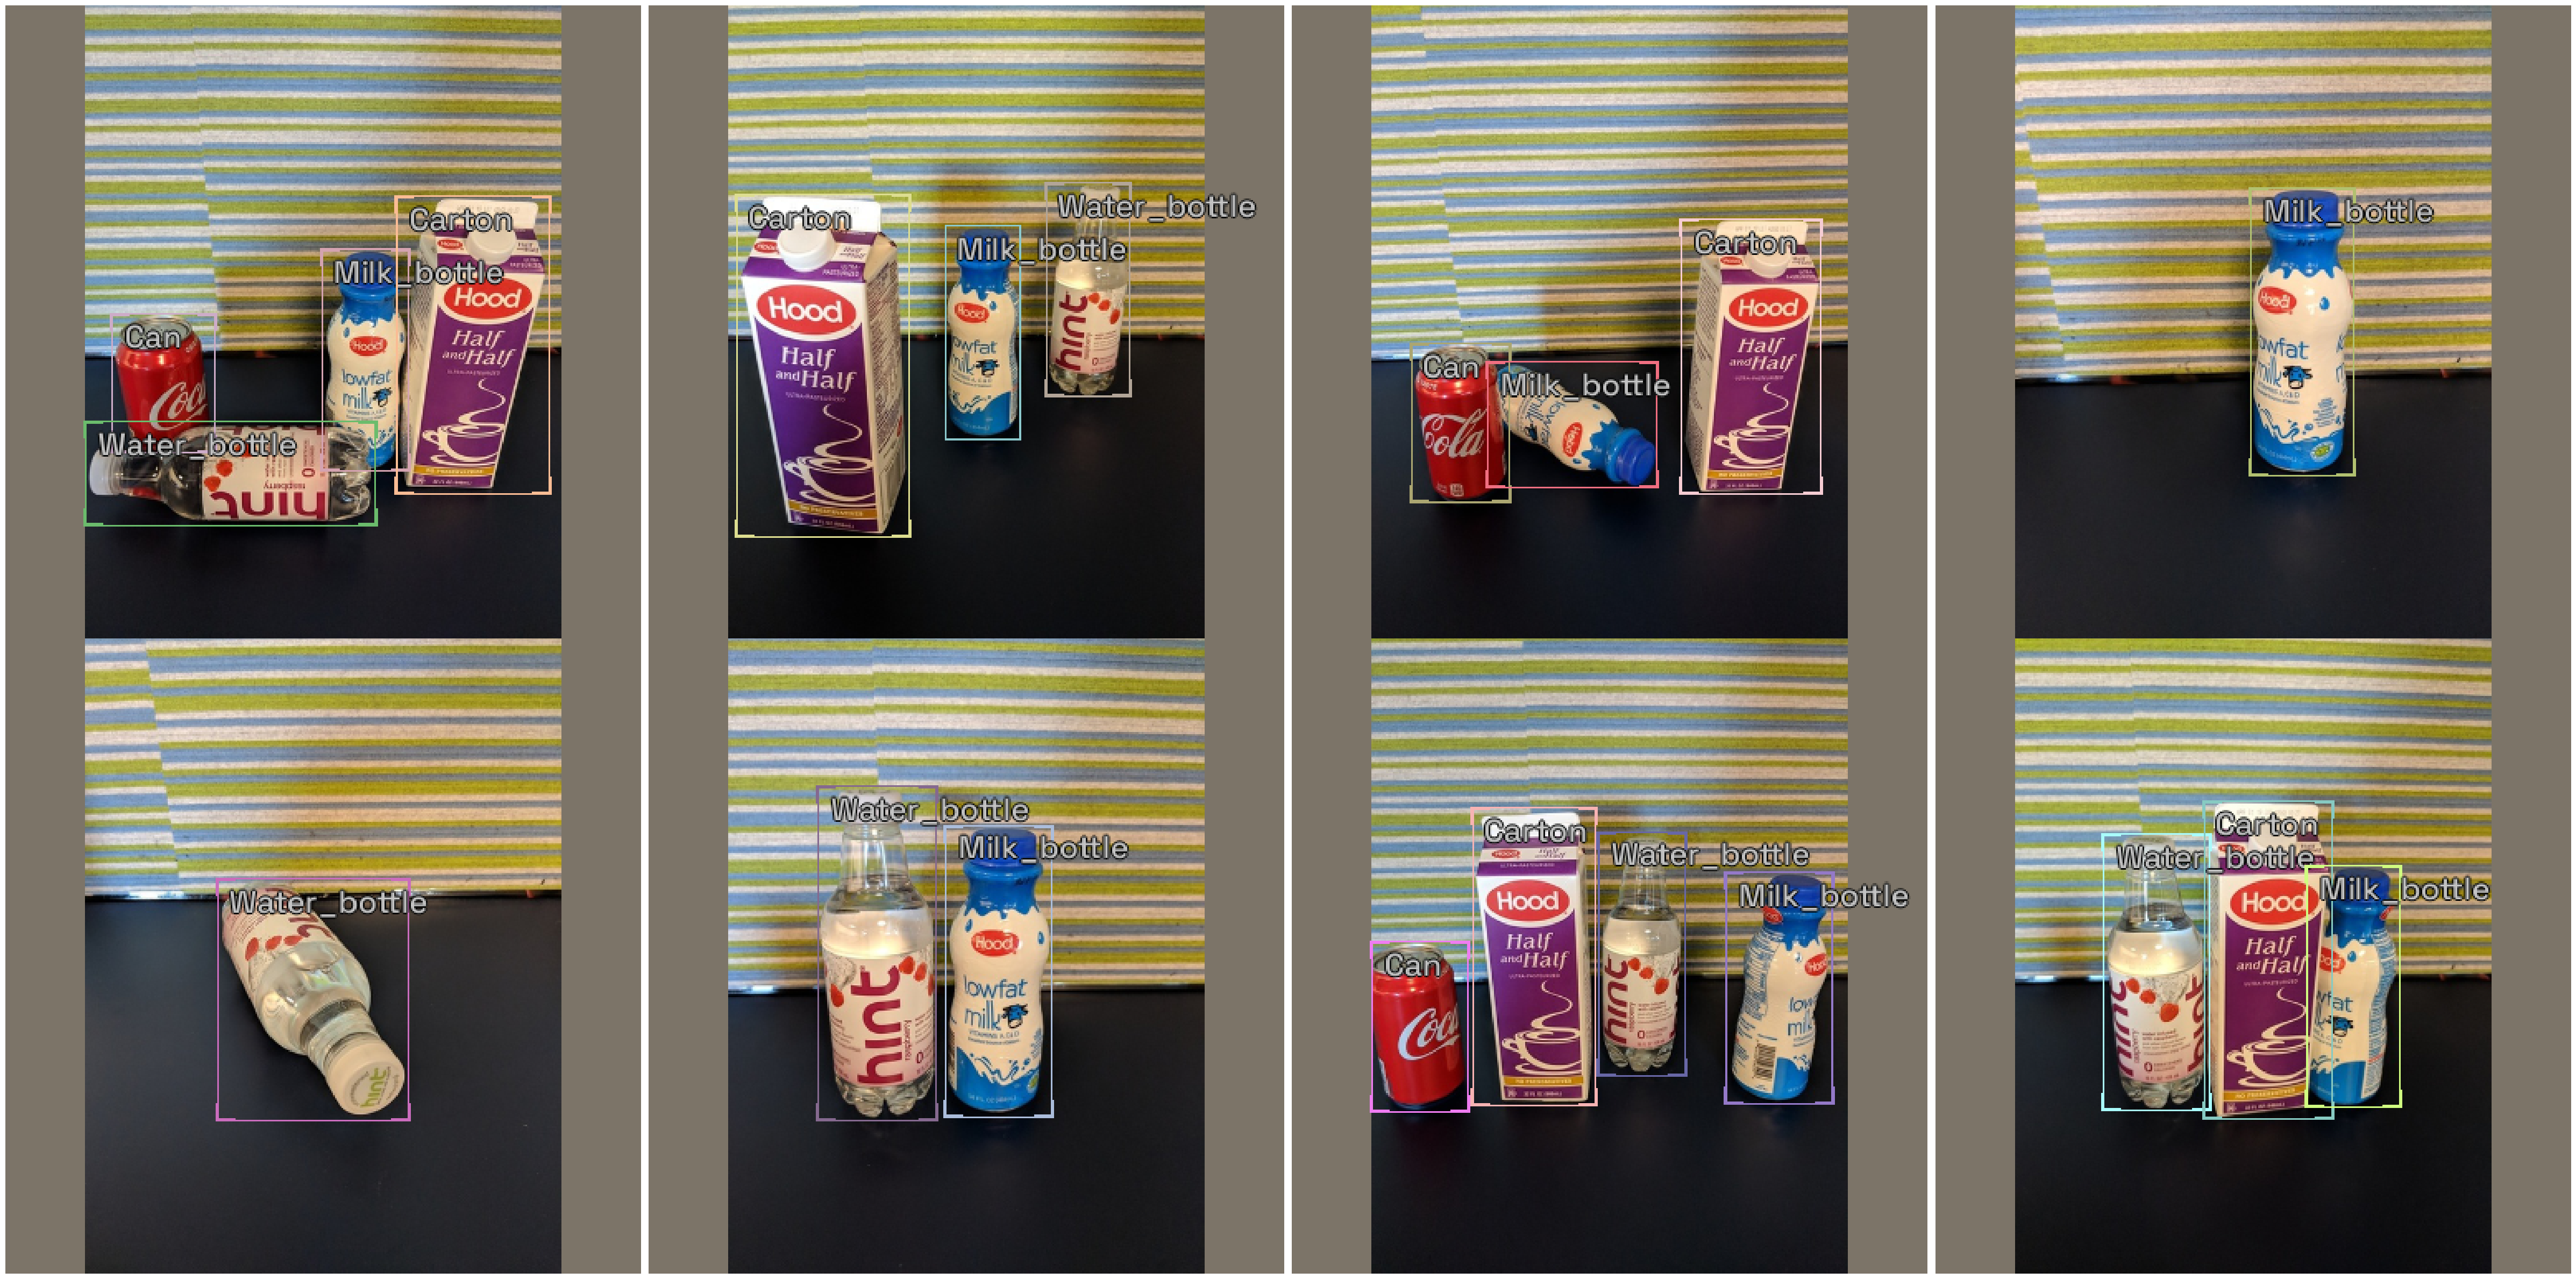

In [18]:
# show batch
model_type.show_batch(first(valid_dl), ncols=4)


In [19]:
# Metrics

# The fastai and pytorch lightning engines collect metrics to track progress during training. IceVision provides metric classes that work across the engines and libraries.

# The same metrics can be used for both fastai and pytorch lightning.

metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]


In [20]:
#Training using fastai

learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)


/home/murat/miniconda3/lib/python3.9/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/murat/miniconda3/lib/python3.9/site-packages/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  warnings.warn(


SuggestedLRs(valley=4.365158383734524e-05)

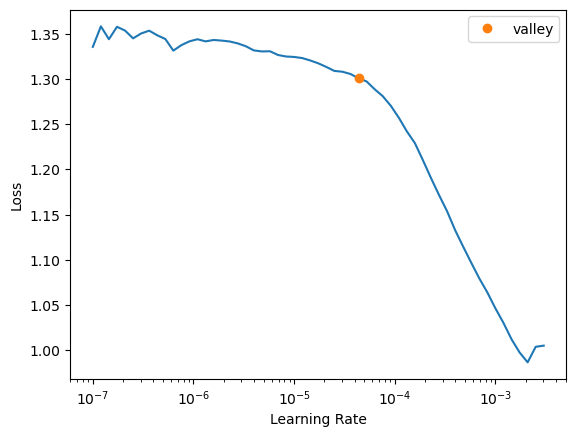

In [21]:
learn.lr_find()


In [22]:
learn.fine_tune(20, 0.00158, freeze_epochs=1)


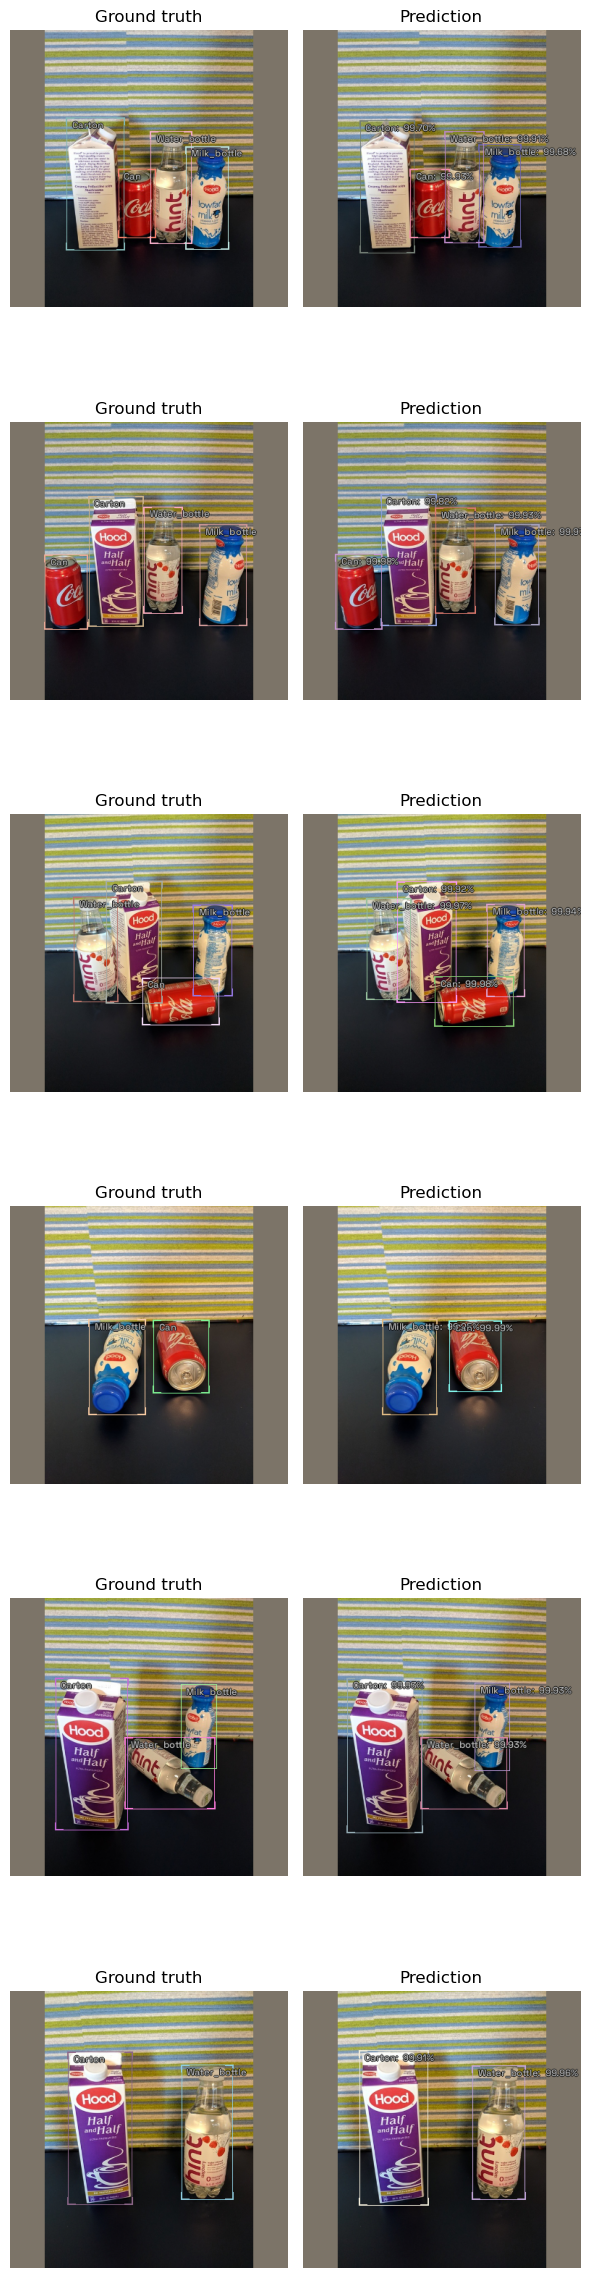

In [23]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

In [24]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=16, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


100%|██████████| 2/2 [00:12<00:00,  6.20s/it]


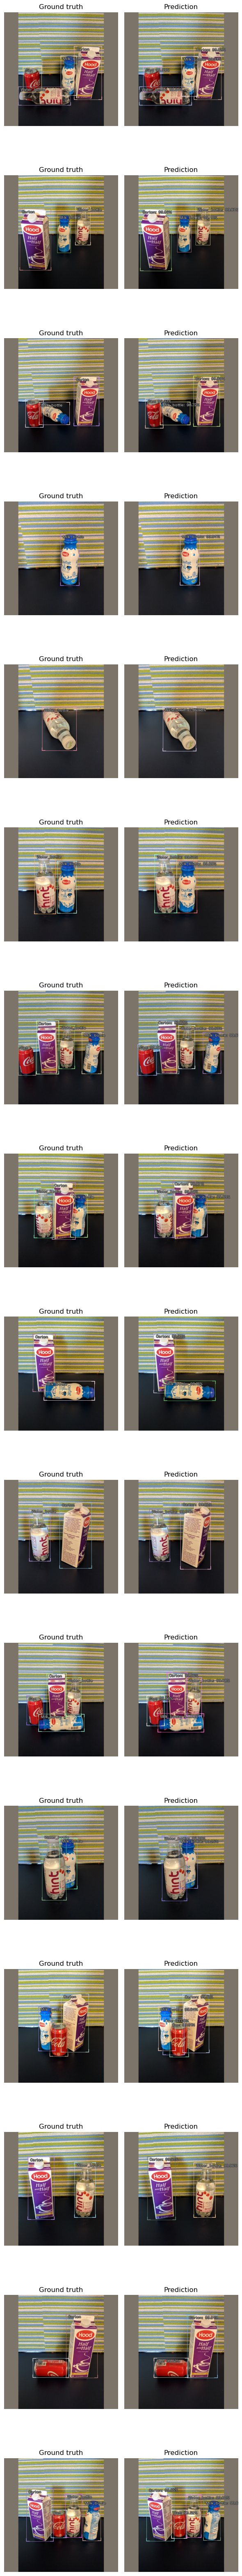

In [25]:
show_preds(preds=preds[:16])